<a href="https://colab.research.google.com/github/SteveTuttle/deep-learning-challenge/blob/main/AlphabetSoupCharity_Optimization_SDT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Preprocessing

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd
application_df = pd.read_csv("https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df.drop(columns=['EIN'],inplace=True)
application_df.head()

,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [3]:
# Determine the number of unique values in each column.
application_df.nunique()

NAME                      19568
APPLICATION_TYPE             17
AFFILIATION                   6
CLASSIFICATION               71
USE_CASE                      5
ORGANIZATION                  4
STATUS                        2
INCOME_AMT                    9
SPECIAL_CONSIDERATIONS        2
ASK_AMT                    8747
IS_SUCCESSFUL                 2
dtype: int64

In [4]:
# Look at APPLICATION_TYPE value counts for binning
application_count = application_df['APPLICATION_TYPE'].value_counts()
application_count

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

In [5]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace` -- using example output to determine cuttoff
application_types_to_replace = application_count[application_count < 200].index.tolist()

# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure binning was successful
application_df['APPLICATION_TYPE'].value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [6]:
# Look at CLASSIFICATION value counts for binning
classification_count = application_df['CLASSIFICATION'].value_counts()
classification_count

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

In [7]:
# You may find it helpful to look at CLASSIFICATION value counts >1
classification_count_filtered = classification_count[classification_count > 1]
classification_count_filtered

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C7200       32
C2300       32
C1240       30
C8000       20
C7120       18
C1500       16
C1800       15
C6000       15
C1250       14
C8200       11
C1238       10
C1278       10
C1235        9
C1237        9
C7210        7
C2400        6
C1720        6
C4100        6
C1257        5
C1600        5
C1260        3
C2710        3
C0           3
C3200        2
C1234        2
C1246        2
C1267        2
C1256        2
Name: CLASSIFICATION, dtype: int64

In [8]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace` -- using example output to determine cuttoff
classifications_to_replace = classification_count[classification_count < 1000].index.tolist()

# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")

# Check to make sure binning was successful
application_df['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [9]:
# Look at NAME value counts for binning
name_count = application_df['NAME'].value_counts()
name_count

PARENT BOOSTER USA INC                                                  1260
TOPS CLUB INC                                                            765
UNITED STATES BOWLING CONGRESS INC                                       700
WASHINGTON STATE UNIVERSITY                                              492
AMATEUR ATHLETIC UNION OF THE UNITED STATES INC                          408
                                                                        ... 
ST LOUIS SLAM WOMENS FOOTBALL                                              1
AIESEC ALUMNI IBEROAMERICA CORP                                            1
WEALLBLEEDRED ORG INC                                                      1
AMERICAN SOCIETY FOR STANDARDS IN MEDIUMSHIP & PSYCHICAL INVESTIGATI       1
WATERHOUSE CHARITABLE TR                                                   1
Name: NAME, Length: 19568, dtype: int64

In [10]:
# Using the NAME value counts >50 to look at the data better
name_count_filtered = name_count[name_count > 50]
name_count_filtered

PARENT BOOSTER USA INC                                                1260
TOPS CLUB INC                                                          765
UNITED STATES BOWLING CONGRESS INC                                     700
WASHINGTON STATE UNIVERSITY                                            492
AMATEUR ATHLETIC UNION OF THE UNITED STATES INC                        408
PTA TEXAS CONGRESS                                                     368
SOROPTIMIST INTERNATIONAL OF THE AMERICAS INC                          331
ALPHA PHI SIGMA                                                        313
TOASTMASTERS INTERNATIONAL                                             293
MOST WORSHIPFUL STRINGER FREE AND ACCEPTED MASONS                      287
LITTLE LEAGUE BASEBALL INC                                             277
INTERNATIONAL ASSOCIATION OF LIONS CLUBS                               266
MOMS CLUB                                                              210
INTERNATIONAL ASSOCIATION

In [11]:
# Choose a cutoff value and create a list of names to be replaced
# use the variable name `names_to_replace`
names_to_replace = name_count[name_count < 100].index.tolist()

# Replace in dataframe
for cls in names_to_replace:
    application_df['NAME'] = application_df['NAME'].replace(cls,"Other")

# Check to make sure binning was successful
application_df['NAME'].value_counts()

Other                                                                 25987
PARENT BOOSTER USA INC                                                 1260
TOPS CLUB INC                                                           765
UNITED STATES BOWLING CONGRESS INC                                      700
WASHINGTON STATE UNIVERSITY                                             492
AMATEUR ATHLETIC UNION OF THE UNITED STATES INC                         408
PTA TEXAS CONGRESS                                                      368
SOROPTIMIST INTERNATIONAL OF THE AMERICAS INC                           331
ALPHA PHI SIGMA                                                         313
TOASTMASTERS INTERNATIONAL                                              293
MOST WORSHIPFUL STRINGER FREE AND ACCEPTED MASONS                       287
LITTLE LEAGUE BASEBALL INC                                              277
INTERNATIONAL ASSOCIATION OF LIONS CLUBS                                266
MOMS CLUB   

In [12]:
# Review info for DataFrame
application_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34299 entries, 0 to 34298
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   NAME                    34299 non-null  object
 1   APPLICATION_TYPE        34299 non-null  object
 2   AFFILIATION             34299 non-null  object
 3   CLASSIFICATION          34299 non-null  object
 4   USE_CASE                34299 non-null  object
 5   ORGANIZATION            34299 non-null  object
 6   STATUS                  34299 non-null  int64 
 7   INCOME_AMT              34299 non-null  object
 8   SPECIAL_CONSIDERATIONS  34299 non-null  object
 9   ASK_AMT                 34299 non-null  int64 
 10  IS_SUCCESSFUL           34299 non-null  int64 
dtypes: int64(3), object(8)
memory usage: 2.9+ MB


In [13]:
# Convert categorical data to numeric with `pd.get_dummies`
# Selecting the categorical data columns
categorical_data = ['NAME', 'APPLICATION_TYPE', 'AFFILIATION', 'CLASSIFICATION', 'USE_CASE', 'ORGANIZATION', 'INCOME_AMT', 'SPECIAL_CONSIDERATIONS']

# Convert categorical columns to get_dummies variables
application_df = pd.get_dummies(application_df, columns=categorical_data)
application_df.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,NAME_ALPHA PHI SIGMA,NAME_AMATEUR ATHLETIC UNION OF THE UNITED STATES INC,NAME_AMERICAN ASSOCIATION OF UNIVERSITY WOMEN,NAME_CIVITAN INTERNATIONAL,NAME_DEMOLAY INTERNATIONAL,NAME_FARMERS EDUCATIONAL AND COOPERATIVE UNION OF AMERICA,NAME_HABITAT FOR HUMANITY INTERNATIONAL INC,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,108590,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,1,5000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1,6692,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,1,142590,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [14]:
# Review updated DataFrame info after get_dummies
application_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34299 entries, 0 to 34298
Data columns (total 75 columns):
 #   Column                                                                   Non-Null Count  Dtype
---  ------                                                                   --------------  -----
 0   STATUS                                                                   34299 non-null  int64
 1   ASK_AMT                                                                  34299 non-null  int64
 2   IS_SUCCESSFUL                                                            34299 non-null  int64
 3   NAME_ALPHA PHI SIGMA                                                     34299 non-null  uint8
 4   NAME_AMATEUR ATHLETIC UNION OF THE UNITED STATES INC                     34299 non-null  uint8
 5   NAME_AMERICAN ASSOCIATION OF UNIVERSITY WOMEN                            34299 non-null  uint8
 6   NAME_CIVITAN INTERNATIONAL                                               34299 non-nul

In [15]:
# Split our preprocessed data into our features and target arrays
y = application_df['IS_SUCCESSFUL'].values
X = application_df.drop(['IS_SUCCESSFUL'], axis=1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=7)

In [16]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Compile, Train and Evaluate the Model

In [17]:
# Determining number of features in X for nn_model
len(X_train[0])

74

In [18]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
input_features_count = len(X_train[0])
hidden_nodes_1stlayer = (input_features_count * 3)
hidden_nodes_2ndlayer = (input_features_count * 0.5)
hidden_nodes_3rdlayer = (input_features_count * 0.5)

nn_model3 = tf.keras.models.Sequential()

# First hidden layer
nn_model3.add(tf.keras.layers.Dense(units=hidden_nodes_1stlayer, activation='relu', input_dim=input_features_count))

# Second hidden layer
nn_model3.add(tf.keras.layers.Dense(units=hidden_nodes_2ndlayer, activation='relu'))

# Third hidden layer
nn_model3.add(tf.keras.layers.Dense(units=hidden_nodes_3rdlayer, activation='relu'))

# Output layer
nn_model3.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Check the structure of the model
nn_model3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 222)               16650     
                                                                 
 dense_1 (Dense)             (None, 37)                8251      
                                                                 
 dense_2 (Dense)             (None, 37)                1406      
                                                                 
 dense_3 (Dense)             (None, 1)                 38        
                                                                 
Total params: 26,345
Trainable params: 26,345
Non-trainable params: 0
_________________________________________________________________


In [19]:
# Compile the model
nn_model3.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [20]:
# Train the model
fit_model3 = nn_model3.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
804/804 [==============================] - 4s 3ms/step - loss: 0.5064 - accuracy: 0.7484
Epoch 2/100
804/804 [==============================] - 2s 2ms/step - loss: 0.4925 - accuracy: 0.7560
Epoch 3/100
804/804 [==============================] - 1s 2ms/step - loss: 0.4899 - accuracy: 0.7572
Epoch 4/100
804/804 [==============================] - 1s 1ms/step - loss: 0.4866 - accuracy: 0.7609
Epoch 5/100
804/804 [==============================] - 1s 2ms/step - loss: 0.4869 - accuracy: 0.7613
Epoch 6/100
804/804 [==============================] - 1s 2ms/step - loss: 0.4855 - accuracy: 0.7620
Epoch 7/100
804/804 [==============================] - 1s 2ms/step - loss: 0.4847 - accuracy: 0.7604
Epoch 8/100
804/804 [==============================] - 1s 1ms/step - loss: 0.4832 - accuracy: 0.7611
Epoch 9/100
804/804 [==============================] - 1s 2ms/step - loss: 0.4832 - accuracy: 0.7632
Epoch 10/100
804/804 [==============================] - 1s 2ms/step - loss: 0.4824 - accura

In [21]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model3.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 1s - loss: 0.5352 - accuracy: 0.7511 - 579ms/epoch - 2ms/step
Loss: 0.5352477431297302, Accuracy: 0.7511370182037354


<Axes: >

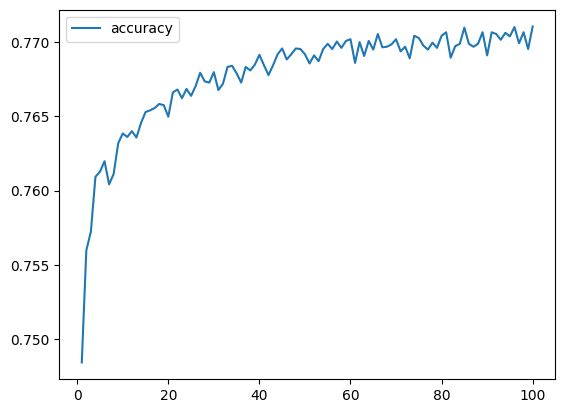

In [22]:
# View model's accuracy while training
history_accuracy3 = pd.DataFrame(fit_model3.history, index=range(1, len(fit_model3.history['accuracy'])+1))

# Plots the model's accuracy
history_accuracy3.plot(y='accuracy')

<Axes: >

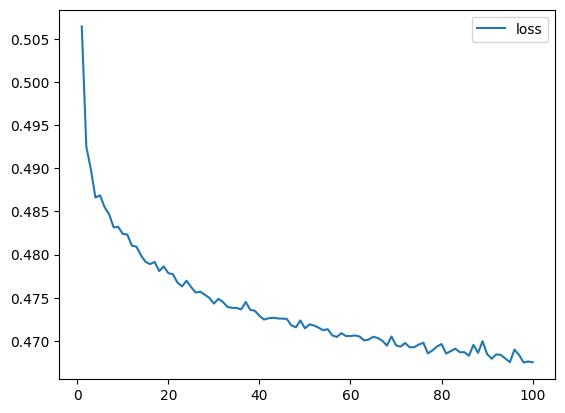

In [23]:
# View model's loss while training
history_loss3 = pd.DataFrame(fit_model3.history, index=range(1, len(fit_model3.history['loss'])+1))

# Plots the model's loss
history_loss3.plot(y='loss')

In [24]:
# Export our model to HDF5 file
nn_model3.save('./AlphabetSoupCharity_Optimization.h5')